## Mall Customer Segmentation

**Context**

This data set is created only for the learning purpose of the customer segmentation concepts, also known as market basket analysis.

**Problem Statement**

You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# Libraries

In [24]:
import warnings
warnings.filterwarnings( 'ignore' )

In [1]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Built-in libraries
#
import pandas as pd
import numpy  as np


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Visualization libraries
#
import matplotlib.pyplot as plt
import seaborn           as sns


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Phik library
# 
import phik
from   phik        import report
from   phik.report import plot_correlation_matrix


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# User library
# 
from utils.OutlierRemoval import *

# Import data


In [2]:
df = pd.read_csv( 'Data/Mall_Customers.csv' )

df.head( 3 )

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


## Pre-process data

In [3]:
df.drop(['CustomerID'], axis = 1, inplace = True)

In [4]:
# Convert class variable from categorical to numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform( df['Gender'] )

# Exploratory Data Analysis

In [5]:
# Check Data Shape and Data Type
# 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int32
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


In [6]:
# Basic descriptive statistics
#
df.describe()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [7]:
# Calculate missing values for each feature
#
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Histplots - Boxplots

c:\Users\poseidon\anaconda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\poseidon\anaconda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\poseidon\anaconda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

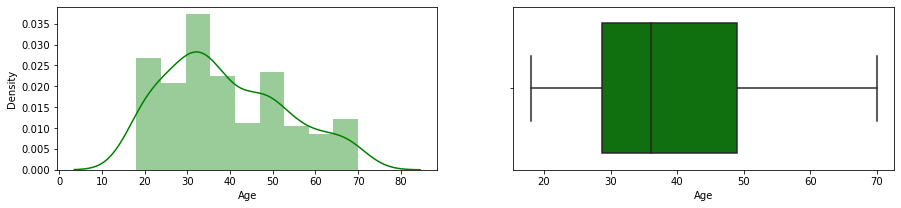

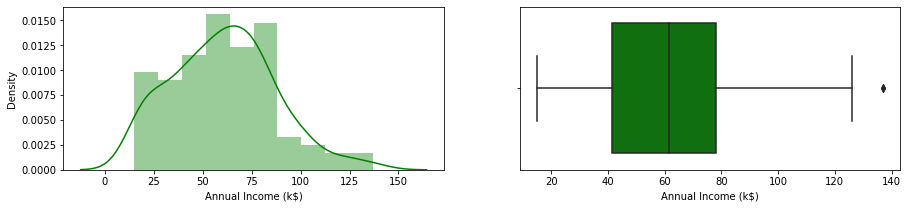

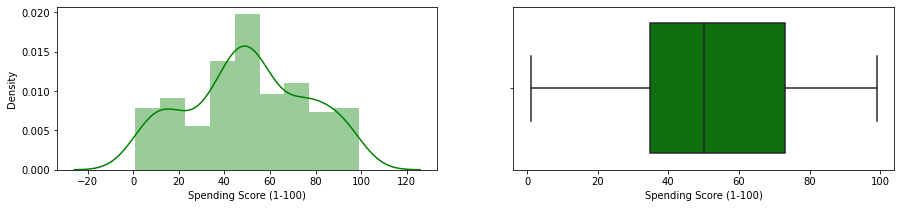

In [8]:
for feature in df.columns[1:]:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 3));
    #
    #
    sns.distplot(df[ feature ], color='g', bins='auto', hist_kws={'alpha': 0.4}, ax=ax[0]);
    sns.boxplot(x = feature, data = df, color='g', ax=ax[1]);

## Examine for outliers

In [26]:
detect_outliers(df = df, nOutlierValues = 1, features = df.columns, method = 'IQR')

Counter({198: 1, 199: 1})
multiple_outliers [198, 199]


[198, 199]

In [28]:
detect_outliers(df = df, nOutlierValues = 1, features = df.columns, method = 'std')

Counter()
multiple_outliers []


[]

In [27]:
detect_outliers(df = df, nOutlierValues = 1, features = df.columns, method = 'z-score')

Counter()
multiple_outliers []


[]

**Findings:** No outliers were detected

## Pearson correlation matrix

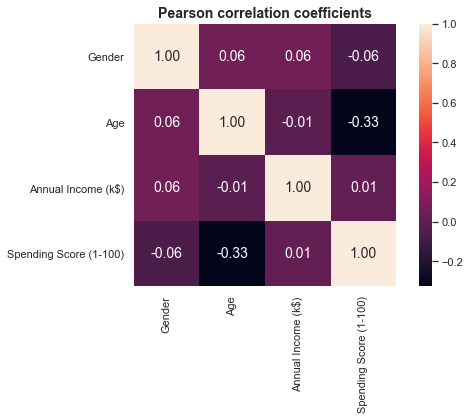

In [33]:
# Calculate correlation matrix
#
corr = df.corr()  


plt.figure(figsize = (8, 6))
sns.set(font_scale = 1)

sns.heatmap(data        = corr,
            cbar        = True,
            annot       = True,
            square      = True,
            fmt         = '.2f',
            annot_kws   = {'size': 14},
            #
            yticklabels = df.columns,
            xticklabels = df.columns)


plt.title('Pearson correlation coefficients', size = 14, weight='bold')
plt.tight_layout()
plt.show()

## $\phi_k$-correlation

In [34]:
phik_overview = df.phik_matrix();

interval columns not set, guessing: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


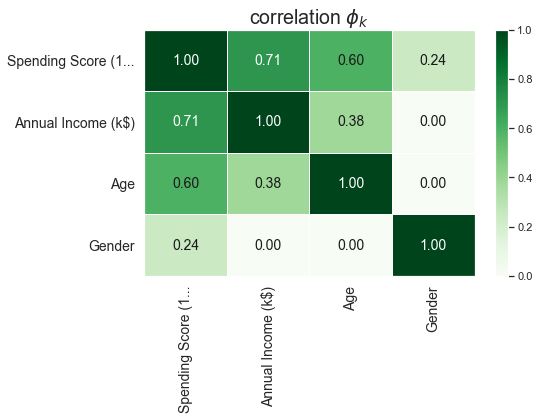

In [35]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels  = phik_overview.columns, 
                        y_labels  = phik_overview.index, 
                        vmin      = 0, 
                        vmax      = 1, 
                        color_map = "Greens", 
                        title     = r"correlation $\phi_k$", 
                        #
                        fontsize_factor = 1.4, 
                        figsize         = (8, 6))

plt.tight_layout()